<a href="https://colab.research.google.com/github/michaelkhan3/tensorflow_cert_checklist/blob/master/01-build-and-train-models/multi_class_categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class categorization

## Get data

In this multi-class categorization exercise we will use the [Fashion-MINST dataset](https://github.com/zalandoresearch/fashion-mnist). Created by [Zalando](https://www.zalando.com/), this dataset contains images of 10 different types of fashion garnments.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Let's have a look at one of the images so we can see what they look like

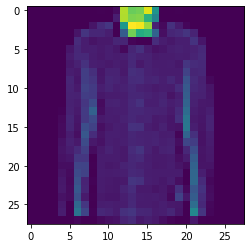

In [3]:
plt.imshow(x_train[33])

## Pre process images

### Rescale images

Rescale the pixel values to an int between 0 and 1

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### Add a third dimention to the dataset

Because our images are in greyscale they only have two dimentions (they don't have the three color channels). To feed the images into the `Conv2D` layer it needs to have a third dimentions, so we expand the train and test images with an extra dimention.


In [5]:
x_test.shape

(10000, 28, 28)

`x_test` has 3 dimentions __(images_in_test_set, width_in_pixels, height_in_pixels)__

In [6]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [7]:
x_test.shape

(10000, 28, 28, 1)

We have now added a 4th dimention for the grey color channel

## Multi-class categorization model

There are three important steps to make a model a __multi-class categirization__ model:

### 1. The last layer of the model

The job of the last layer of the model is to convert all the calculations of the neural network into the output you are looking for, in this case which garment is this picture of.

For multi-class categorization the last layer should have one neuron for each class you are trying to categorize. In this case we have 10 different types of garnments so we use 10 neurons with softmax activation.

One of the neurons will have an output that is close to 1, the rest of the neurons will have outpus that are close to 0

![multi-class_classification.png](https://drive.google.com/uc?export=view&id=1KW1poPZkjGiONtsxUiqdzgrbUZvE-xsX)


### 2. Use the correct loss function

There are two options of loss functions for multi-class categorization:

*   __Sparse categorical crossentropy__ - `tf.keras.losses.SparseCategoricalCrossentropy()`
  - Use if the labels are integers e.g. `2`
*   __Categorical crossentropy__ - `tf.keras.losses.CategoricalCrossentropy()` 
  - Use if the labels are one-hot encoded lists e.g. `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]`


### 3. Data labels are in the correct format

Make sure the labels for your data are in the correct format. As mentioned above use the correct loss for the shape of your labels




In [8]:
print(f"The shape of training labels are {y_train.shape}")
print(f"The first 10 labels = {y_train[:10]}")

The shape of training labels are (60000,)
The first 10 labels = [9 0 0 3 0 2 7 2 5 5]


Our labels are represented as integers, not one-hot encoded arrays, therefore we should use __sparse categorical crossentropy loss__


In [9]:
multi_class_categorization_model = tf.keras.Sequential([
                                                        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                                        tf.keras.layers.MaxPool2D(2, 2),
                                                        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                                        tf.keras.layers.MaxPool2D(2, 2),
                                                        tf.keras.layers.Flatten(),
                                                        tf.keras.layers.Dense(256, activation='relu'),
                                                        # Final layer has 10 neurons with sofmax activation
                                                        tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
multi_class_categorization_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    # Use sparse categorical cross entropy loss for multi-class categorization
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [11]:
history = multi_class_categorization_model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4551 - accuracy: 0.8356 - val_loss: 0.3525 - val_accuracy: 0.8712
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3014 - accuracy: 0.8892 - val_loss: 0.3100 - val_accuracy: 0.8856
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2572 - accuracy: 0.9054 - val_loss: 0.2913 - val_accuracy: 0.8918
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2248 - accuracy: 0.9155 - val_loss: 0.2639 - val_accuracy: 0.9041
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1965 - accuracy: 0.9265 - val_loss: 0.2571 - val_accuracy: 0.9055
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1722 - accuracy: 0.9356 - val_loss: 0.2542 - val_accuracy: 0.9096
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1512 - accuracy: 0.9432 - val_loss: 0.2654 - val_accuracy: 0.9090
Epoch 